<h1><center>Case Study Windschläg - 2019</center></h1>

To achieve the 1.5°C target, an average reduction of 14% in CO2 emissions per year is required by 2040. Strategies to achieve the target include reducing energy consumption in the first instance and improving the efficiency of energy systems. In addition, the replacement of energy systems with renewable energies is planned.

The following case study presents the application of the DRAF library to analyze different scenarios proposed by comparing CO2 emissions and capital investment.

The first section presents the analysis of the energy demand of the school and kindergarten located in Windschläg, a sector of the city that is far away from the future heat network. 

In the next section, the development of the reference scenario for the year 2019 is presented, where the current energy systems (grid, pellet and HOB) are modeled.

Additional scenarios are then modeled where photovoltaic, heat pump and hydrogen CHP systems are implemented. 

In [2]:
import draf
import elmada
import pandas as pd

from draf.components import *


**Demand data reading & analysis**

In [3]:

demand_strom_schule = pd.read_csv("Windschlaeg_Schule_KiGa_2019_Hourly.csv", usecols=[1], sep=";", decimal=",").squeeze("columns")
demand_strom_kiga = pd.read_csv("Windschlaeg_Schule_KiGa_2019_Hourly.csv", usecols=[2], sep=";", decimal=",").squeeze("columns")

demand_waerme_schule = pd.read_csv("Windschlaeg_Schule_KiGa_2019_Hourly.csv", usecols=[4], sep=";", decimal=",").squeeze("columns")
demand_waerme_kiga = pd.read_csv("Windschlaeg_Schule_KiGa_2019_Hourly.csv", usecols=[5], sep=";", decimal=",").squeeze("columns")

demand_gas_schule = pd.read_csv("Windschlaeg_Schule_KiGa_2019_Hourly.csv", usecols=[7], sep=";", decimal=",").squeeze("columns")
demand_gas_kiga = pd.read_csv("Windschlaeg_Schule_KiGa_2019_Hourly.csv", usecols=[8], sep=";", decimal=",").squeeze("columns")

In [4]:
sc = draf.Scenario(year=2019, freq="60min")

**Total demand of electricitity, heat, and gas**  

In [5]:
demand_strom = demand_strom_schule + demand_strom_kiga
demand_waerme =demand_waerme_schule + demand_waerme_kiga
demand_gas = demand_gas_schule + demand_gas_kiga

**Electricity**

C:\Users\Offenburg\Desktop\draf\draf\plotting\scen_plotting.py:824: UserWarning:

FixedFormatter should only be used together with FixedLocator



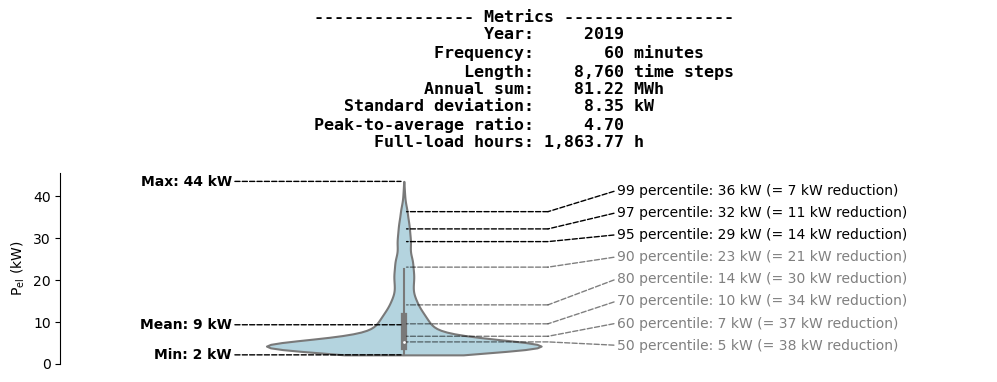

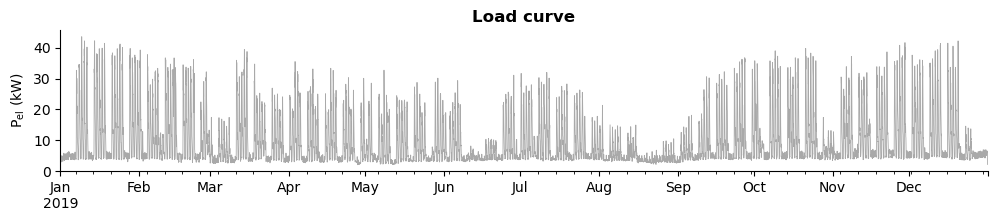

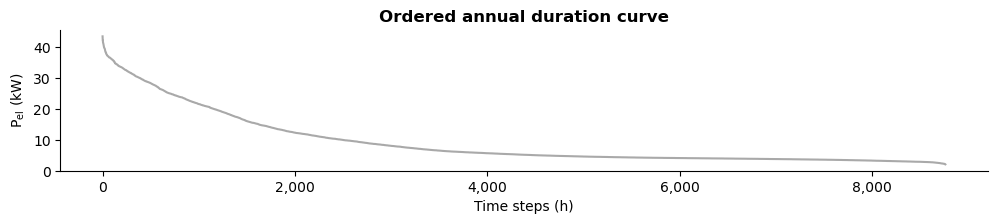

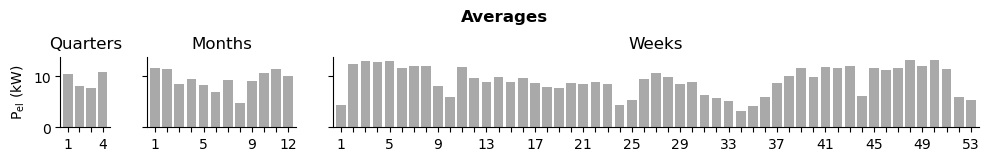

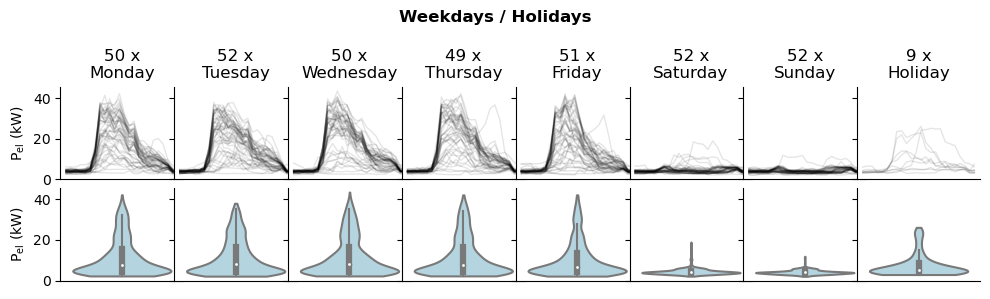

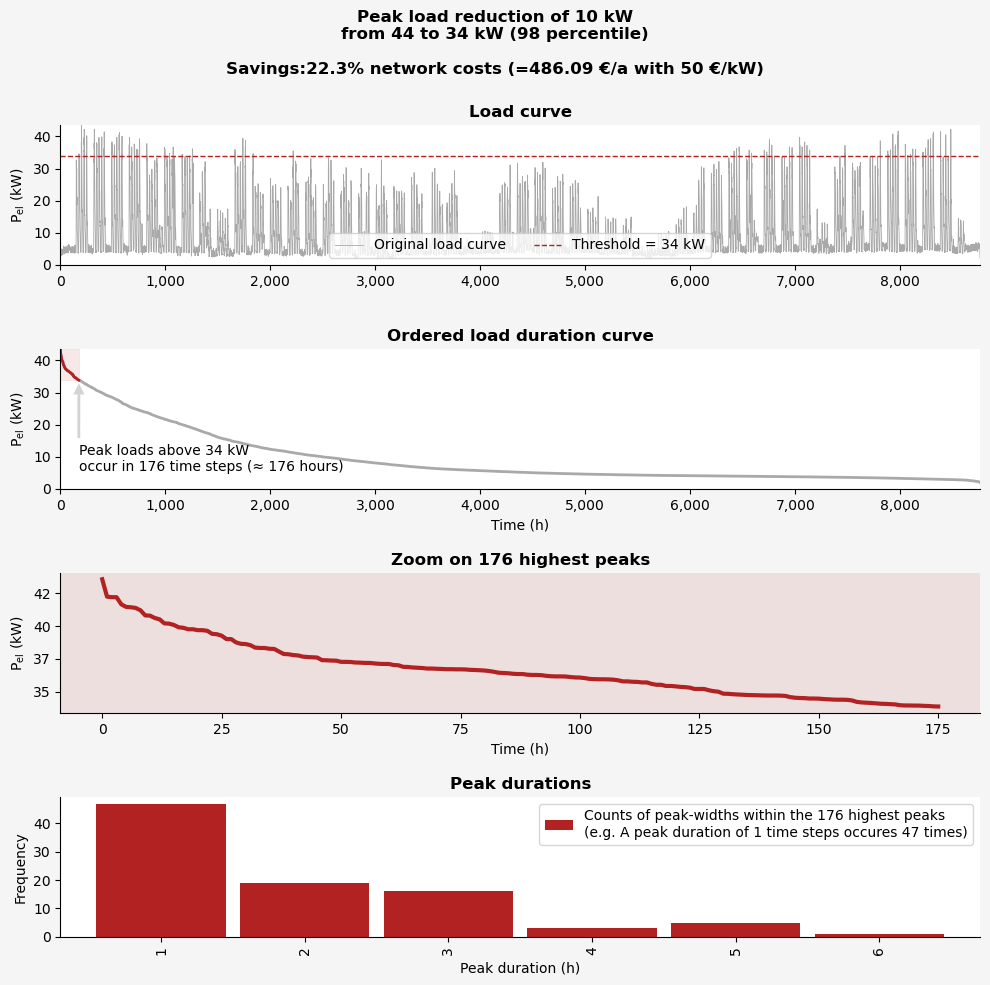

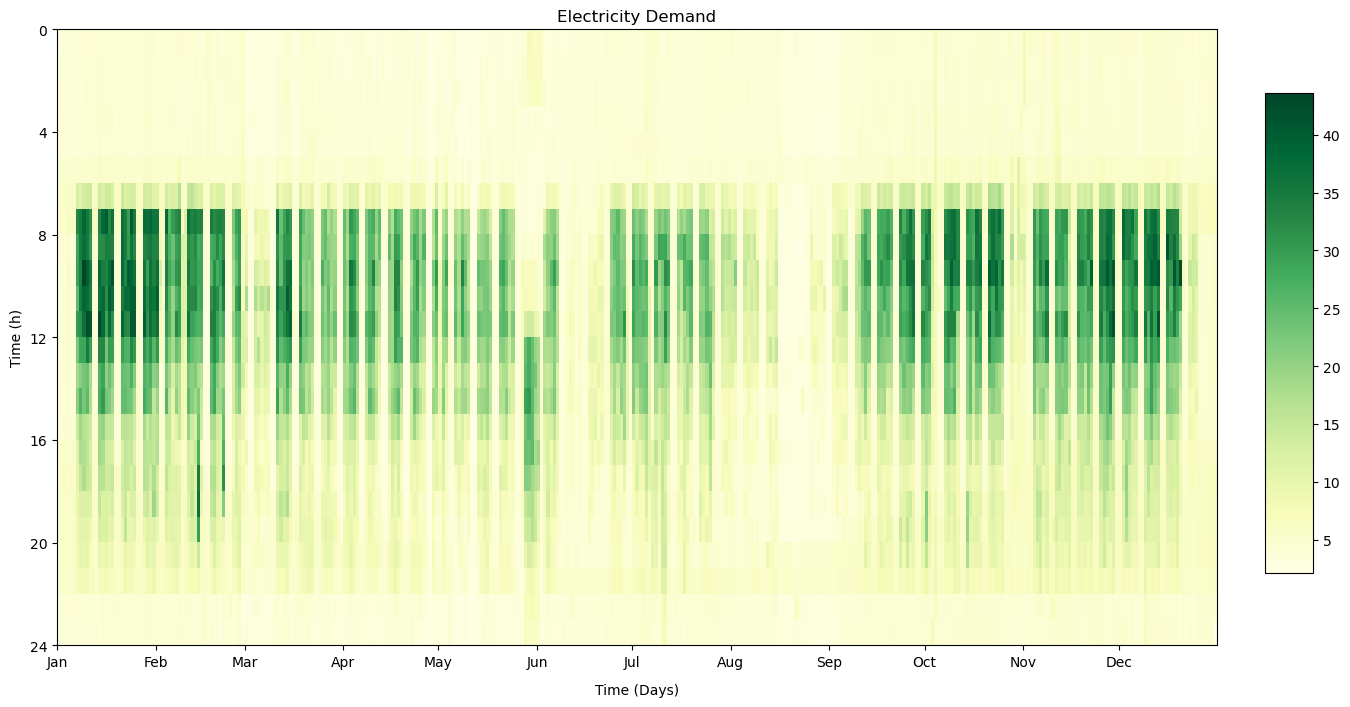

In [11]:
da = sc.analyze_demand(demand_strom)
pla = da.show_peaks(target_percentile=98, c_EG_peak=50.0)
sc.plot.heatmap(demand_strom, title='Electricity Demand', divergingNorm= False, cmap='YlGn');

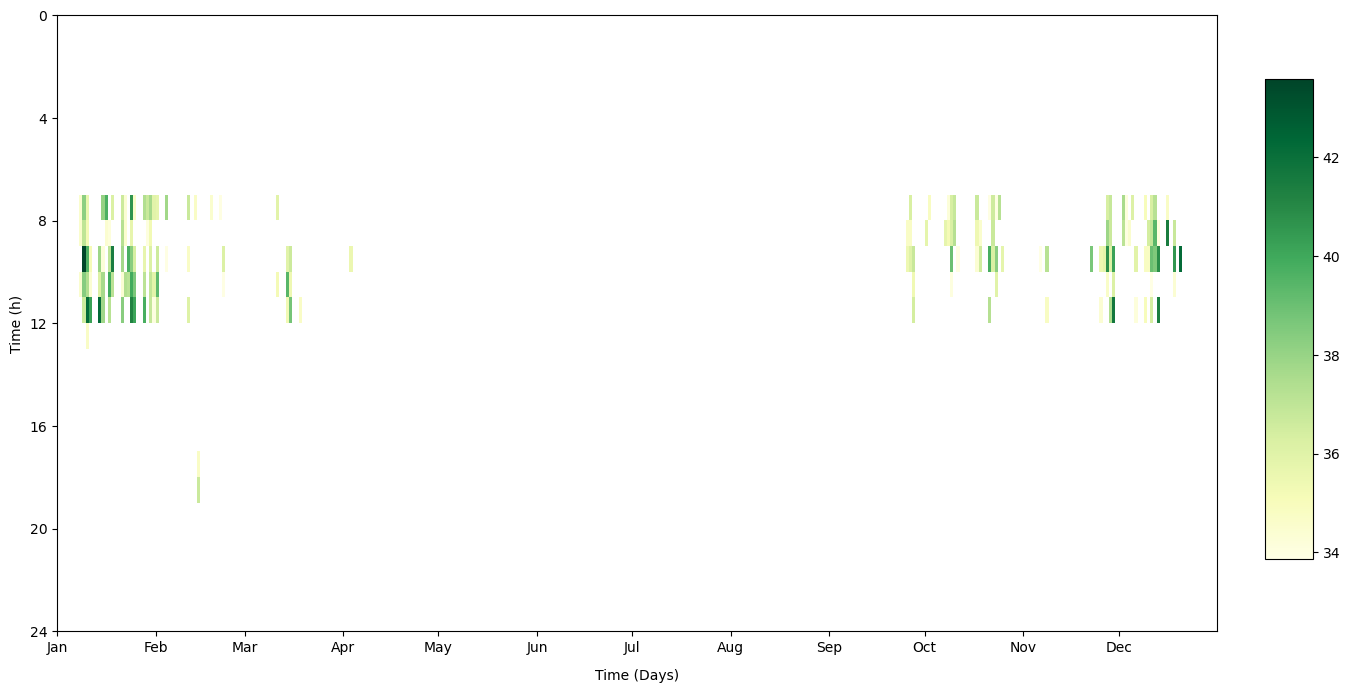

In [7]:
sc.plot.heatmap(demand_strom.where(demand_strom>pla.target_peakload), divergingNorm= False, cmap='YlGn');

**Heat**

C:\Users\Offenburg\Desktop\draf\draf\plotting\scen_plotting.py:824: UserWarning:

FixedFormatter should only be used together with FixedLocator



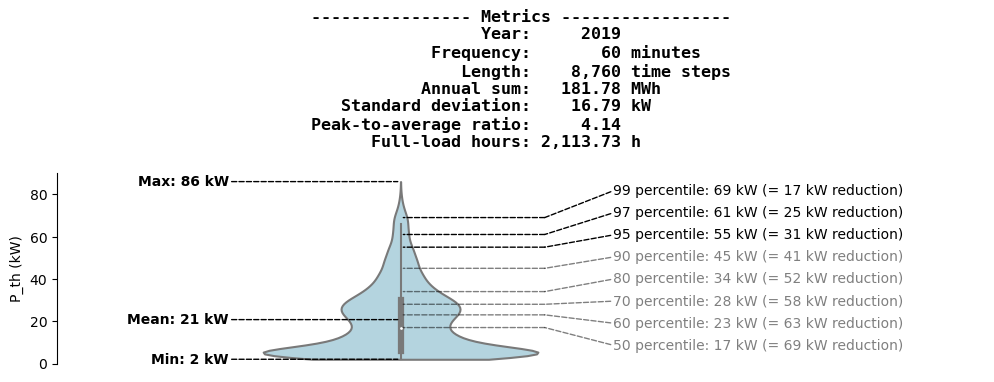

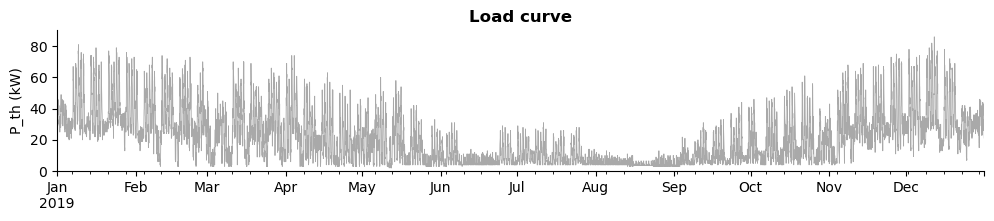

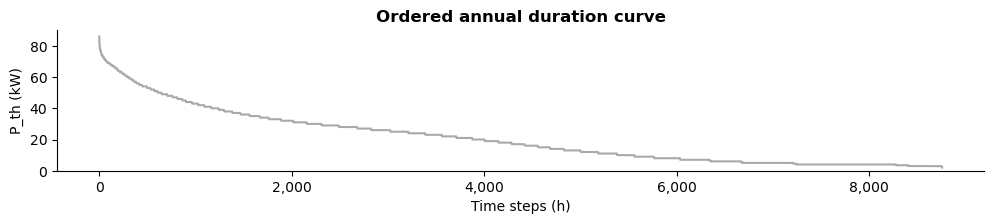

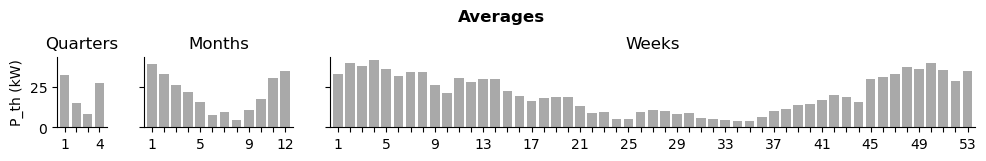

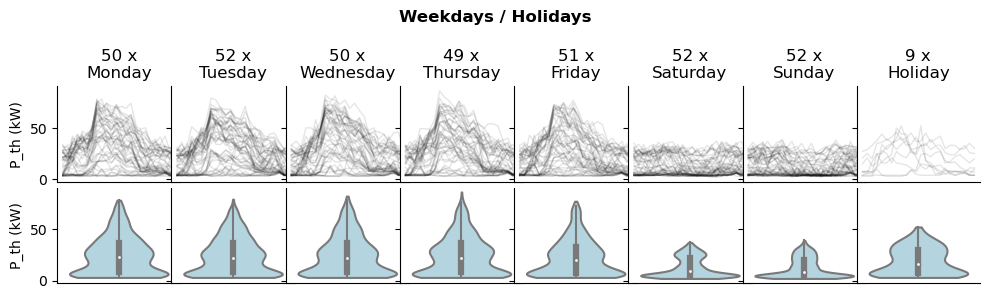

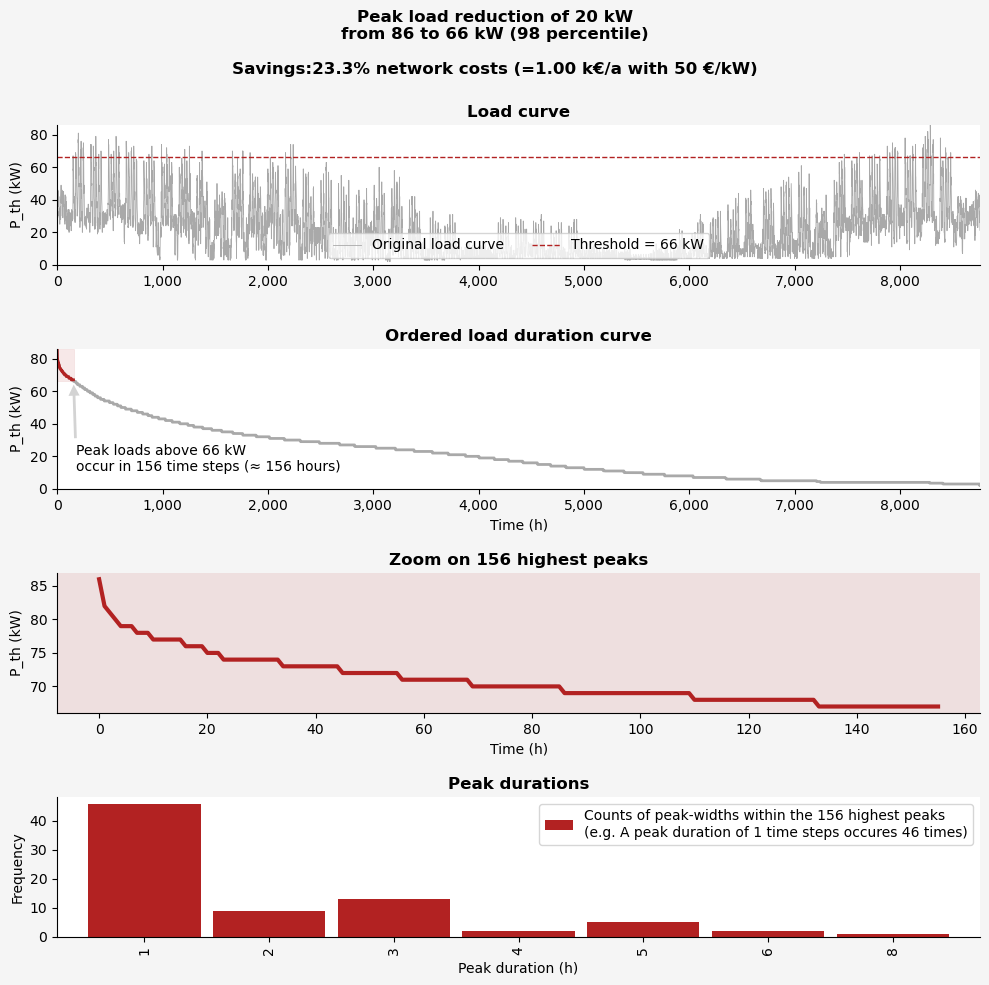

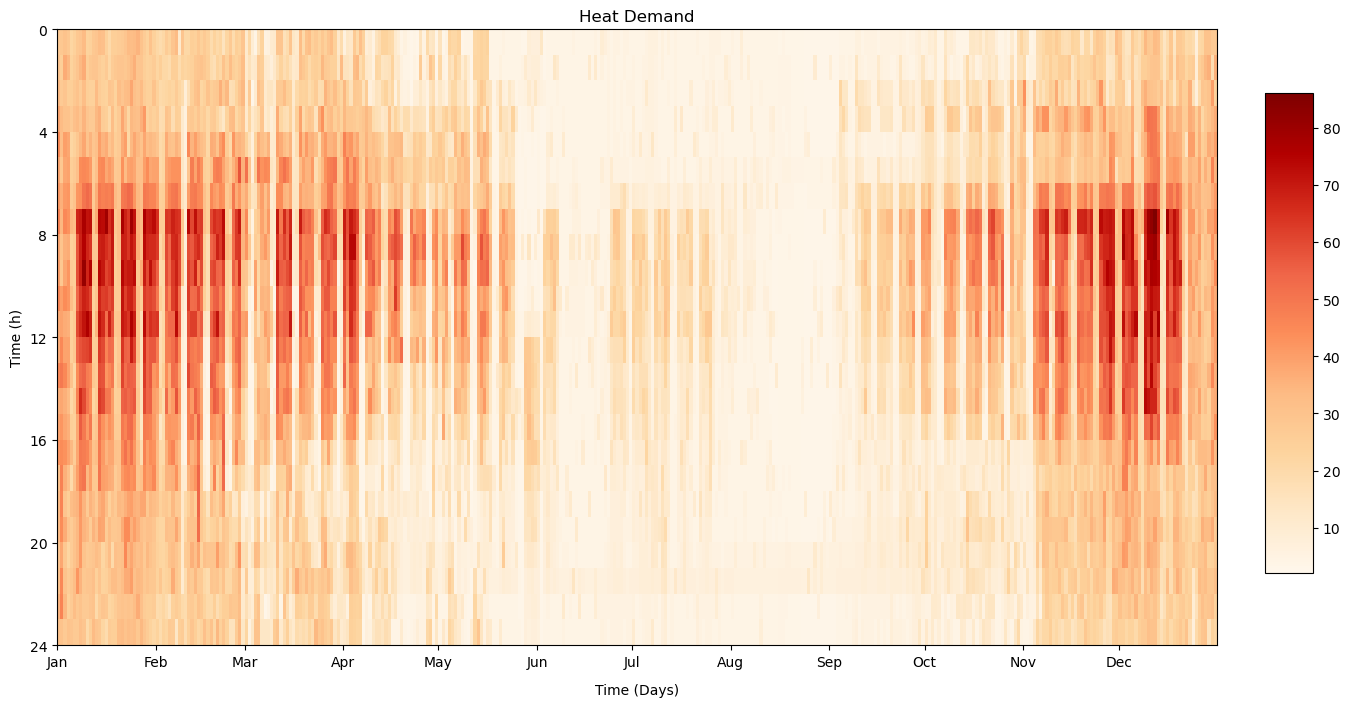

In [13]:
da = sc.analyze_demand(demand_waerme, ylabel='P_th (kW)')
pla = da.show_peaks(target_percentile=98, c_EG_peak=50.0)
sc.plot.heatmap(demand_waerme, title='Heat Demand' , divergingNorm= False, cmap='OrRd');

**Gas**

C:\Users\Offenburg\Desktop\draf\draf\plotting\scen_plotting.py:824: UserWarning:

FixedFormatter should only be used together with FixedLocator



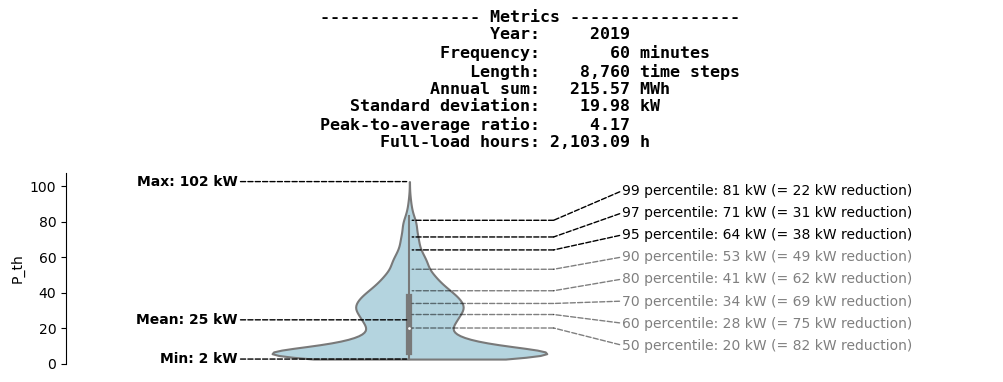

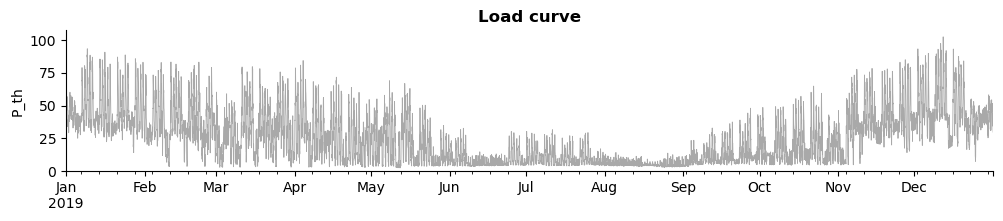

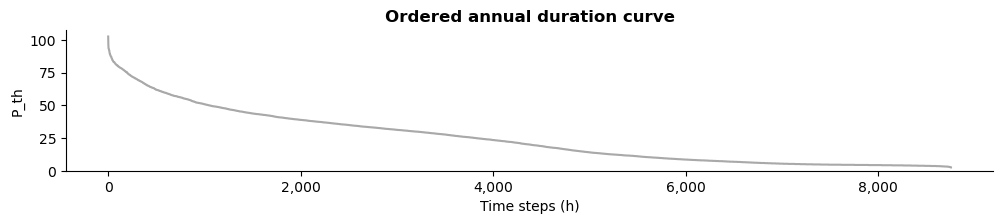

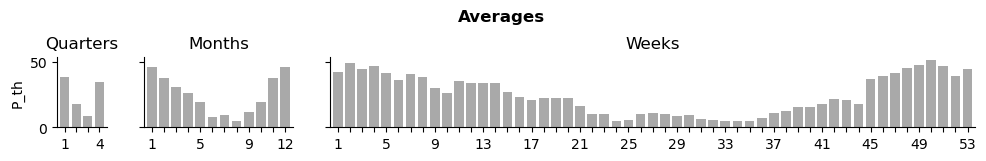

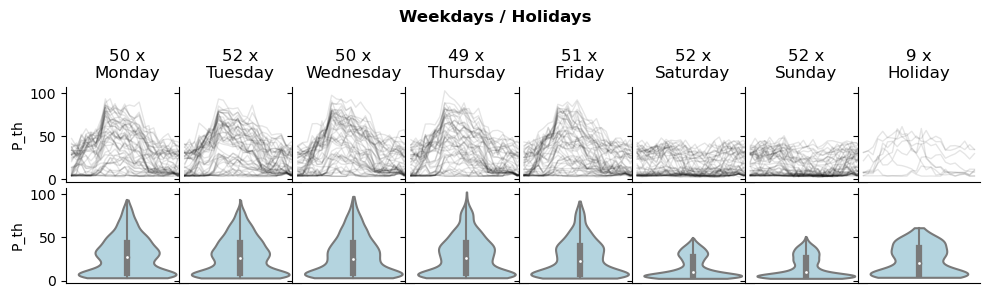

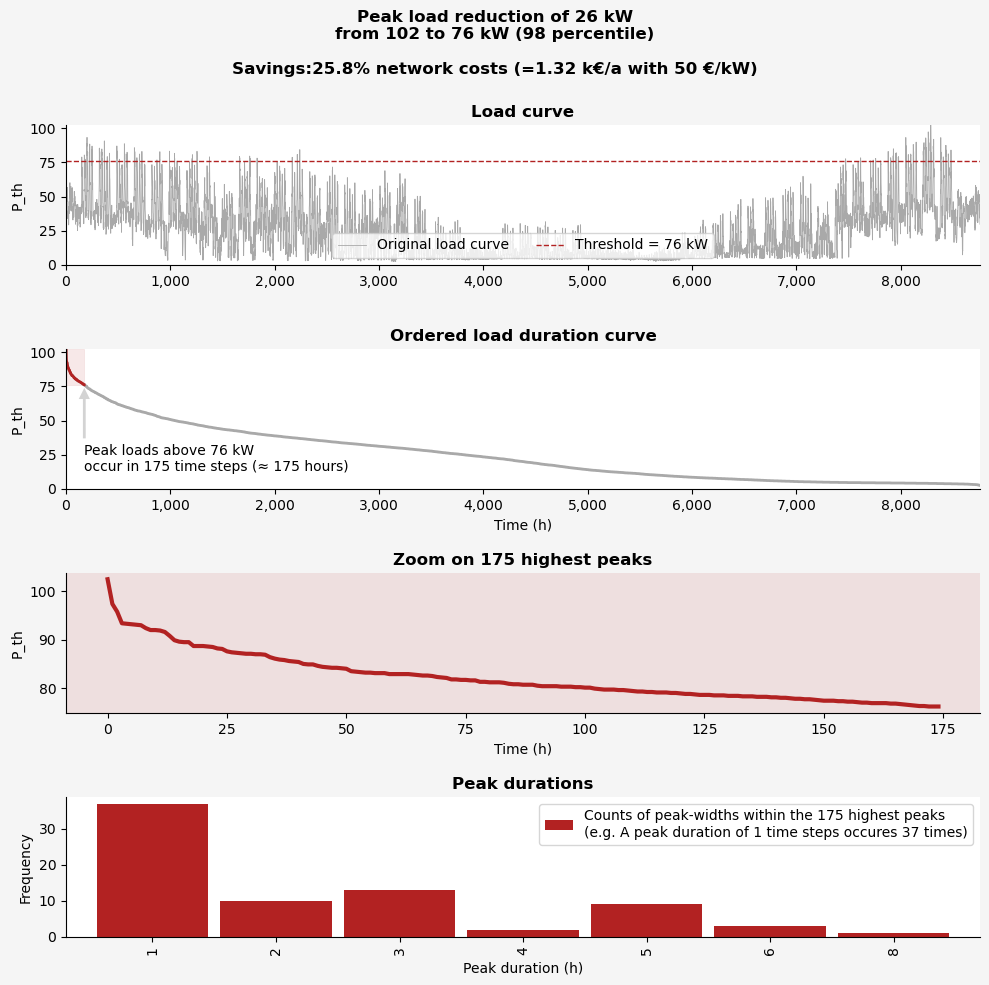

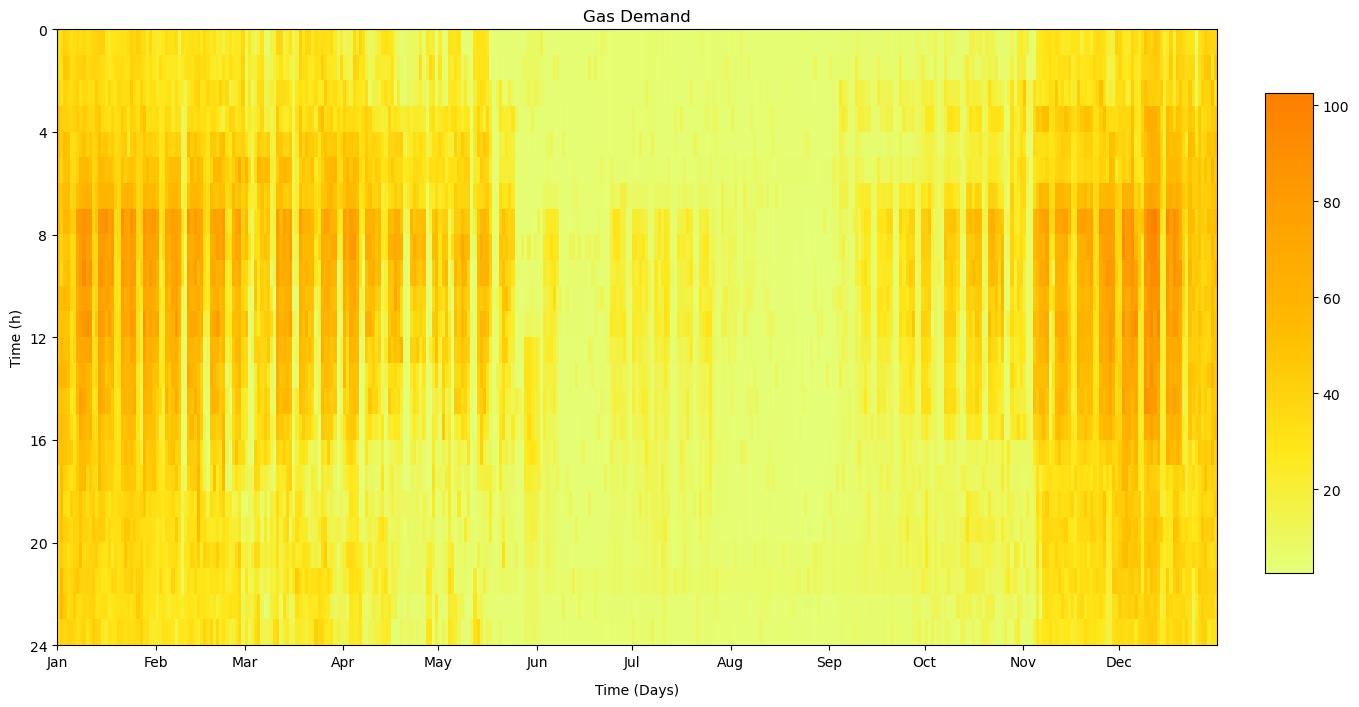

In [14]:
da = sc.analyze_demand(demand_gas, ylabel='P_th')
pla = da.show_peaks(target_percentile=98, c_EG_peak=50.0)
sc.plot.heatmap(demand_gas, title='Gas Demand' , divergingNorm= False, cmap='Wistia');

**Energy (electricity + heat)**

C:\Users\Offenburg\Desktop\draf\draf\plotting\scen_plotting.py:824: UserWarning:

FixedFormatter should only be used together with FixedLocator



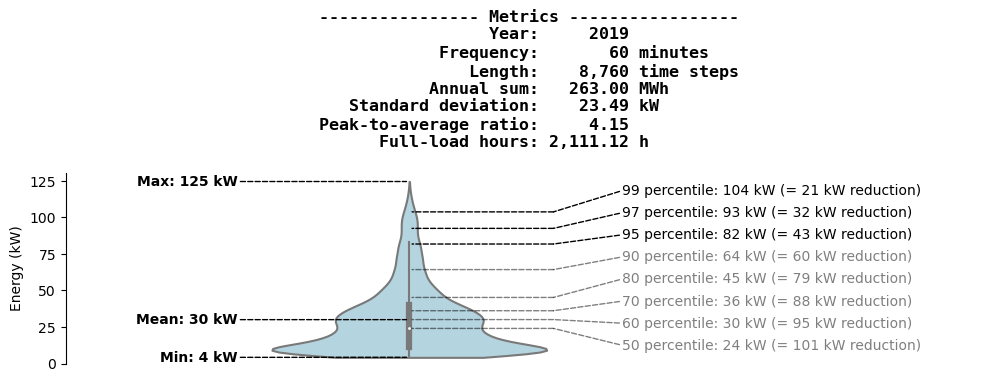

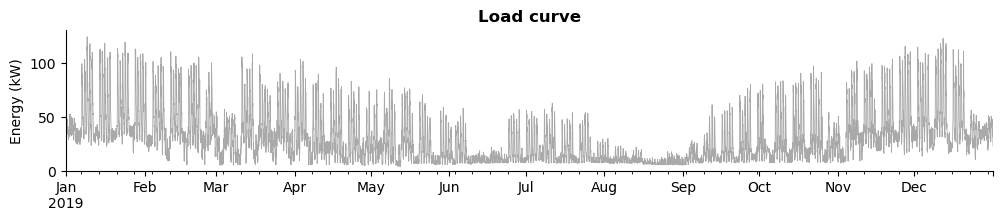

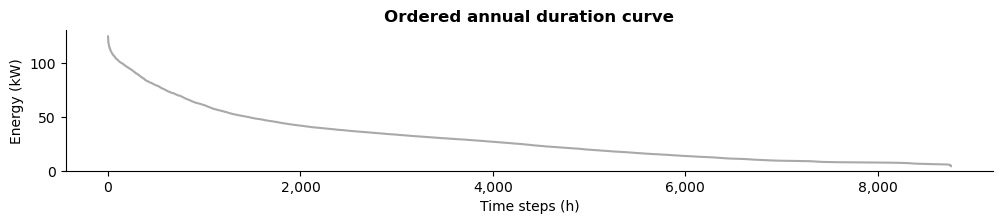

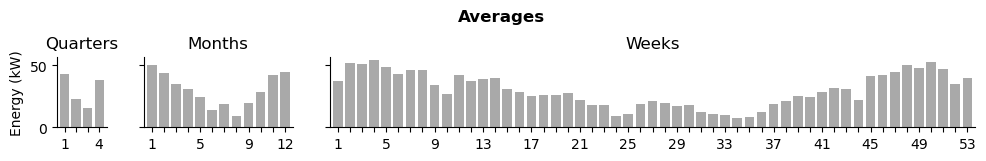

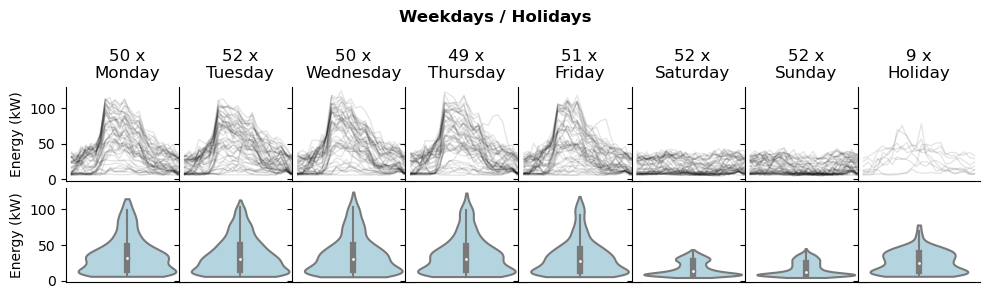

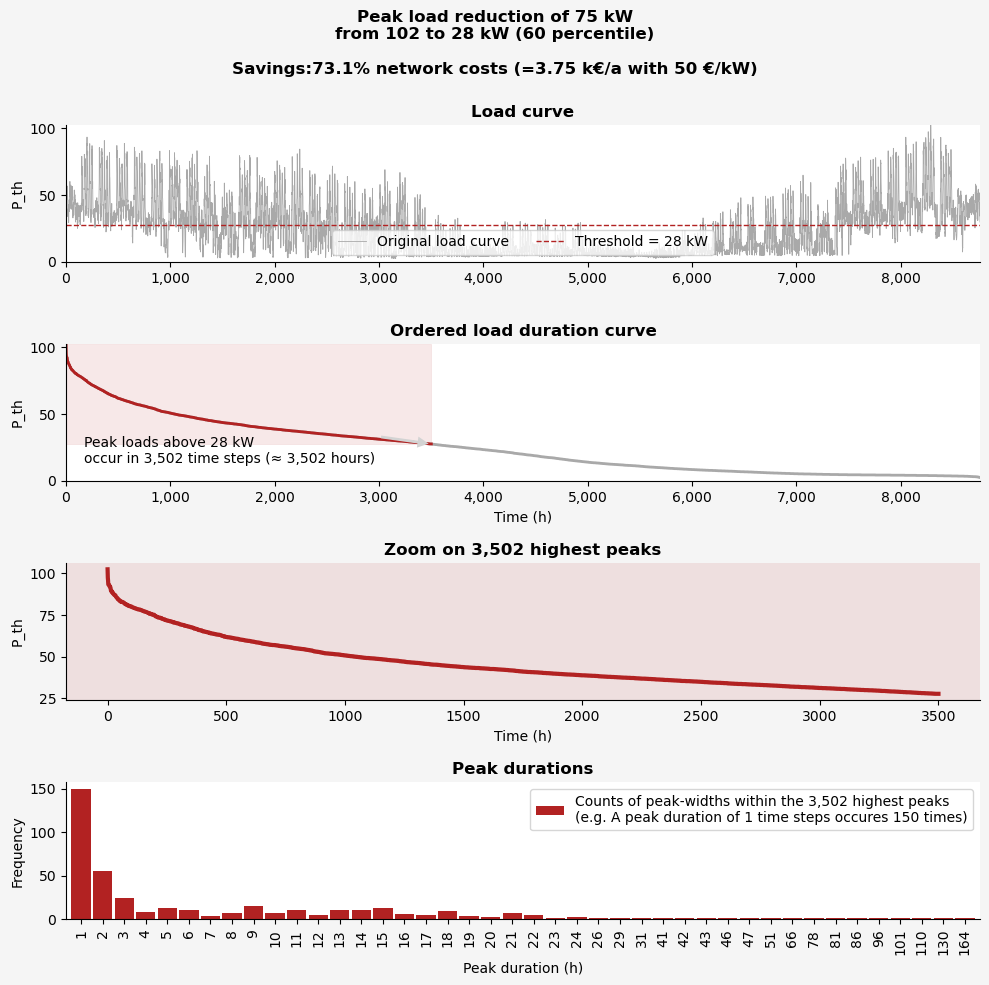

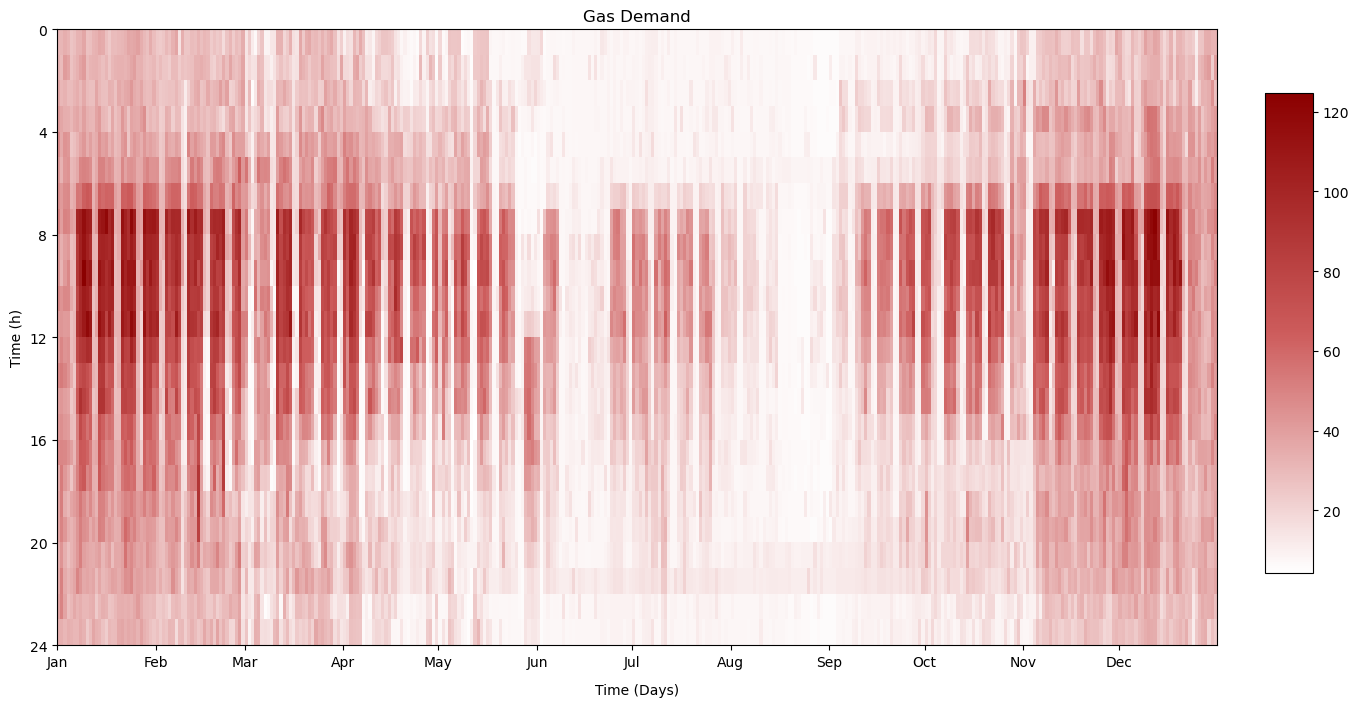

In [15]:
energy = demand_strom + demand_waerme
de = sc.analyze_demand(energy, ylabel='Energy (kW)')
pla = da.show_peaks(target_percentile=60, c_EG_peak=50.0)
sc.plot.heatmap(energy, title='Gas Demand');

**Create a case study**

In [16]:
cs = draf.CaseStudy("Case Study Windschläg", year=2019, country="DE", freq="60min", coords=(48.51, 7.95), consider_invest=True)
# define a modeling horizon (default: whole year):
cs.set_time_horizon(start="Jan-01 00:00")

<CaseStudy object>
• name: Case Study Windschläg
• doc: No doc available.
• year: 2019
• freq: 60min
• dtindex: [...]
• dtindex_custom: [...]
• country: DE
• consider_invest: True
• coords: (48.51, 7.95)
• scens: [...]
• plot: <draf.plotting.cs_plotting.CsPlotter object at 0x00000209B0FA61C0>
• obj_vars: ('C_TOT_', 'CE_TOT_')
• mdl_language: gp
• dt_info:
  ⤷ t1 = 0     (Tuesday, 2019-01-01 00:00:00),
  ⤷ t2 = 8759  (Tuesday, 2019-12-31 23:00:00)
  ⤷ Length = 8760

**Reference Scenario**

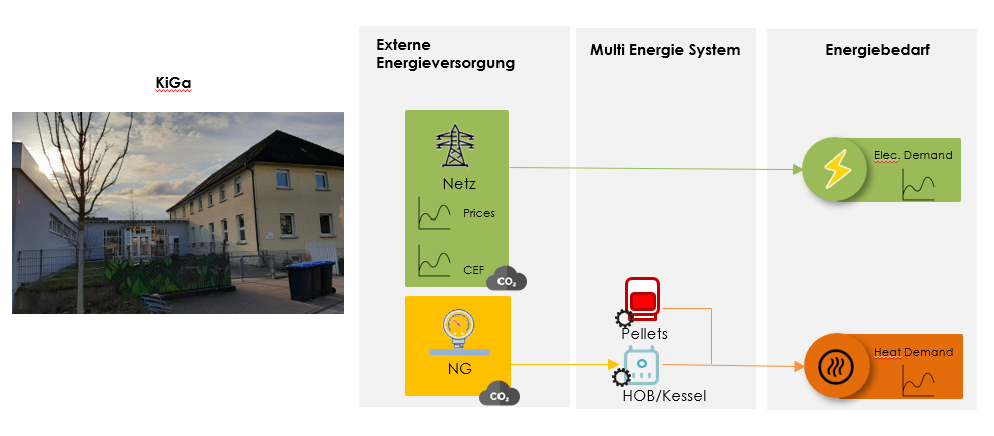

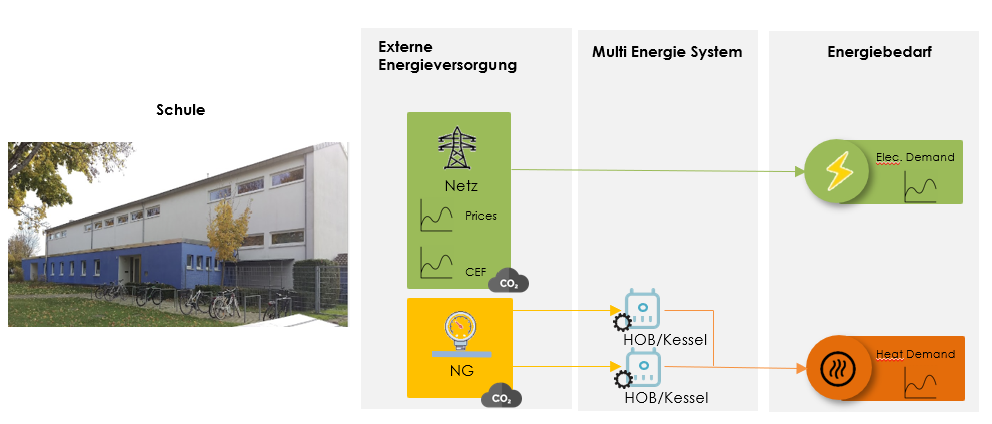

**Create and parametrize a reference scenario**

In [18]:
# name and doc of add_REF_scen are already defined in source code. name ="REF", doc="Reference Scenario"
sc = cs.add_REF_scen("REF", components=[Main, EG])


HTTPError: 403 Client Error: Forbidden for url: https://transparency.entsoe.eu/api?documentType=A44&in_Domain=10Y1001A1001A82H&out_Domain=10Y1001A1001A82H&securityToken=YOUR_ENTSOE_KEY&periodStart=201812312300&periodEnd=201912312300